<a href="https://colab.research.google.com/github/vitorbarbosa123/grafos/blob/master/EI02_2021_1_JGraphT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EI02 - JGraphT - Criação e Importação de Grafos

Este notebook apresenta, a avaliação EI02 sobre atividades básicas para criação e importação de grafos não-direcionados usando a API [JGraphT](https://jgrapht.org/).

Referências:
- Notebooks das aulas anteriores

- Docs Python Bindings: https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/

*Atenção:* Os blocos de código neste roteiro, especialmente referentes a instalação e importação e definições auxiliares, devem ser executados na sequência em que são apresentados abaixo, antes de cada uso deste notebook, a fim de garantir que as definições necessárias em cada trecho foram devidamente importadas/criadas.

# Instalação da JGraphT e Importação de Pacotes e Arquivos deste Notebook

Python bindings pode ser instalado usando pip no escopo de qualquer interpretador python. 
Abaixo, temos a instalação para este notebook e a importação de bibliotecas e arquivos que usaremos a seguir.

In [ ]:
# Instalando a JgraphT para uso neste notebook
!pip install jgrapht

# Importando a JgraphT
import jgrapht

# Importanto funções para print de vértices e arestas
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/importutil.py
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/getutil.py
from drawutil import draw_graph
from importutil import import_gml
from getutil import get_vertexid,get_vertice_labels,get_edge_labels

# Download de arquivos de grafos usados neste notebook
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/bp1.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/cubo.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/acyclic.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/K5.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/pseudograph-Aula02.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/cycle5.gml

# Funções e pacotes para teste
import unittest
# From: https://eli.thegreenplace.net/2011/08/02/python-unit-testing-parametrized-test-cases
class ParametrizedTestCase(unittest.TestCase):
    """ TestCase classes that want to be parametrized should
        inherit from this class.
    """
    def __init__(self, methodName='runTest', param=None):
        super(ParametrizedTestCase, self).__init__(methodName)
        self.param = param

    @staticmethod
    def parametrize(testcase_klass, param=None):
        """ Create a suite containing all tests taken from the given
            subclass, passing them the parameter 'param'.
        """
        testloader = unittest.TestLoader()
        testnames = testloader.getTestCaseNames(testcase_klass)
        suite = unittest.TestSuite()
        for name in testnames:
            suite.addTest(testcase_klass(name, param=param))
        return suite


     |████████████████████████████████| 9.8 MB 4.6 MB/s 
--2021-11-29 12:57:23--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6595 (6.4K) [text/plain]
Saving to: ‘drawutil.py’

drawutil.py         100%[===================>]   6.44K  --.-KB/s    in 0s      

2021-11-29 12:57:23 (78.8 MB/s) - ‘drawutil.py’ saved [6595/6595]

--2021-11-29 12:57:23--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/importutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.

# Tarefa 01

## Descrição
O objetivo é criar um programa para construir o grafo G = (V(G),E(G)), onde V(G)={a,b,c,d} e E(G)={ab,ac,cd,ad}


Quantidade de vértices: 4
Quantidade de arestas: 4


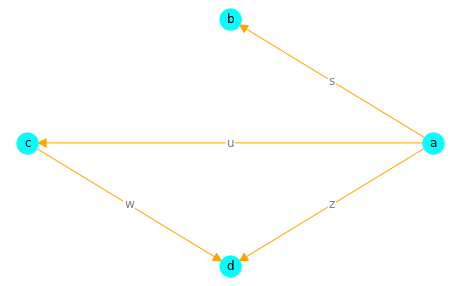

In [ ]:
# Criando o objeto grafo
# O grafo é simples, não-direcionado e não-ponderado
g = jgrapht.create_graph()

# Defina um dicionário com identificadores e atributos dos vértices
v_attrs = {
    0 : {'label' : 'a'},
    1 : {'label' : 'b'},
    2 : {'label' : 'c'},
    3 : {'label' : 'd'}
} 

g.add_vertices_from([x for x in range(0,4)])
g.add_edge(0,1,edge=0)
g.add_edge(0,2,edge=1)
g.add_edge(2,3,edge=2)
g.add_edge(0,3,edge=4)
 

# Adicione os vértices
g.add_vertex(0)
g.add_vertices_from([0,1,2,3])

# Adicione as arestas


# Imprima a quantidade de vértices e arestas do grafo invocando 
print(f'Quantidade de vértices: {len(g.vertices)}')

print(f'Quantidade de arestas: {len(g.edges)}')
# os métodos correspondentes

# Apresente um desenho do grafo com os labels dos vértices
draw_graph(g,vlabel='label',v_attrs=v_attrs,
           elabel='label',e_attrs=e_attrs)

## Testes Automáticos

In [ ]:
class TestSimpleGraph (unittest.TestCase):
  def test01 (self):
    self.assertEqual(g.number_of_vertices,4)
    self.assertEqual(g.number_of_edges,4)
  
  def test02 (self):
    self.assertCountEqual([v_attrs[v]['label'] for v in g.vertices],['a','b','c','d'])

  def test03 (self):
    a = get_vertexid('a',v_attrs)
    self.assertTrue(all(g.contains_edge_between(a,x) for x in g.vertices if not x == a))

  def test04 (self):
    c = get_vertexid('c',v_attrs)
    d = get_vertexid('d',v_attrs)
    self.assertTrue(g.contains_edge_between(c,d))


# call your test
suite = unittest.TestSuite()
suite.addTest(TestSimpleGraph('test01'))
suite.addTest(TestSimpleGraph('test02'))
suite.addTest(TestSimpleGraph('test03'))
suite.addTest(TestSimpleGraph('test04'))
unittest.TextTestRunner(verbosity=2).run(suite)


test01 (__main__.TestSimpleGraph) ... ok
test02 (__main__.TestSimpleGraph) ... ok
test03 (__main__.TestSimpleGraph) ... ok
test04 (__main__.TestSimpleGraph) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.014s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

# Tarefa 02

## Descrição

Implemente uma função que importa um grafo no formato gml e calcula a sua matriz de adjacências. A matriz deve ser armazenada em uma lista de listas, onde cada lista representa uma linha da matriz de acordo com o exemplo abaixo.

Entrada:
V(G) = {a,b,c}
E(G) = {ab,bc,aa}

Saída: 

[[2,1,0],
 [1,0,1],
 [0,1,0]]

In [ ]:
#@title  { run: "auto", vertical-output: true }
filename = "pseudograph-Aula02.gml" #@param ["bp1.gml", "cubo.gml", "acyclic.gml", "K5.gml", "pseudograph-Aula02.gml", "cycle5.gml"]
layout = "fruchterman_reingold" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

def adjacency_matriz (g):
  # ESCREVA AQUI O SEU CÓDIGO
    result = []
    v_attrs = g.vertices
    e_attrs = g.edges
    for v1 in v_attrs:
        lista = []
        for v2 in v_attrs:
            contador = 0
            for edge in e_attrs:
                 if g.edge_source(edge) == v1 and g.edge_target(edge) == v2:   
                   contador += 1               
                 if g.edge_source(edge) == v2 and g.edge_target(edge) == v1:                       
                   contador += 1
            lista.append(contador)
        result.append(lista)

    return result
      


# Criando o grafo
g = jgrapht.create_graph(directed=False,weighted=False, 
                         allowing_self_loops=True,
                         allowing_multiple_edges=True)

v_attrs = {}
e_attrs = {}

import_gml(g,v_attrs,e_attrs,filename)
print(g)

# Desenhando o grafo e imprimindo a matriz
if (jgrapht.properties.has_multipleedges(g) or 
    jgrapht.properties.has_selfloops(g)):
  print("Não é possível desenhar: Multigrafo ou Pseudografo\n")
else:     
  draw_graph(g,layout,vlabel='label',v_attrs=v_attrs)
  print('  {}'.format(' '.join([v_attrs[x]['label'] for x in g.vertices])))
adj = adjacency_matriz(g)
for l in range(len(adj)):
  print('{} {}'.format(v_attrs[l]['label'],' '.join(map(str,adj[l]))))
    
  



({0, 1, 2, 3, 4}, {0={0,1}, 1={1,2}, 2={2,3}, 3={3,2}, 4={4,3}, 5={0,3}, 6={3,1}, 7={0,0}})
Não é possível desenhar: Multigrafo ou Pseudografo

a 2 1 0 1 0
b 1 0 1 1 0
c 0 1 0 2 0
d 1 1 2 0 1
e 0 0 0 1 0


## Testes Automáticos

In [ ]:
#Testes para a função adjacency_matrix

class TestAdjMatrix(unittest.TestCase):

    def test_empty(self):
      g1 = jgrapht.create_graph(directed=False,weighted=False)
      expected = []
      self.assertEqual(adjacency_matriz (g1),expected)
    
    def test_pseudograph(self):
        g1 = jgrapht.create_graph(directed=False,weighted=False,
                                  allowing_self_loops=True,
                                  allowing_multiple_edges=True)
        g1.add_vertices_from([0,1])
        g1.add_edges_from([(0,0),(0,0),(1,1)])
        expected = [[4,0],
                    [0,2]]
        self.assertEqual(adjacency_matriz (g1),expected)

    def test_multigraph(self):
        g1 = jgrapht.create_graph(directed=False,weighted=False,
                                  allowing_multiple_edges=True)
        g1.add_vertices_from([0,1,2,3])
        g1.add_edges_from([(0,1),(0,2),(0,3),(1,3),(2,3),(1,3)])
        expected = [[0,1,1,1],
                    [1,0,0,2],
                    [1,0,0,1],
                    [1,2,1,0]]
        self.assertEqual(adjacency_matriz (g1),expected)

    def test_simplegraph(self):
        g1 = jgrapht.create_graph(directed=False,weighted=False)
        g1.add_vertices_from([0,1,2,3])
        g1.add_edges_from([(0,1),(0,2),(0,3),(1,3),(2,3)])
        expected = [[0,1,1,1],
                    [1,0,0,1],
                    [1,0,0,1],
                    [1,1,1,0]]
        self.assertEqual(adjacency_matriz (g1),expected)


# call your test
suite = unittest.TestSuite()
suite.addTest(TestAdjMatrix('test_empty'))
suite.addTest(TestAdjMatrix('test_pseudograph'))
suite.addTest(TestAdjMatrix('test_multigraph'))
suite.addTest(TestAdjMatrix('test_simplegraph'))
unittest.TextTestRunner(verbosity=2).run(suite)


test_empty (__main__.TestAdjMatrix) ... ok
test_pseudograph (__main__.TestAdjMatrix) ... ok
test_multigraph (__main__.TestAdjMatrix) ... ok
test_simplegraph (__main__.TestAdjMatrix) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.016s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>